Classification:
1. K nearest neighbor (K-NN)

Dimensionality Reduction techniques:
1. Principal component analysis (PCA)
2. Linear discriminative analysis (LDA)

# K-NN


Text(0.5, 1.0, 'Data visualization')

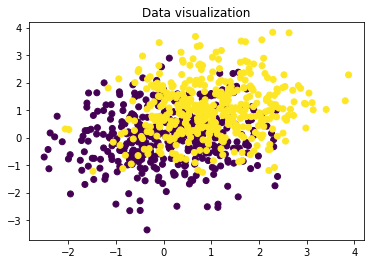

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools


mean1=np.array([0,0])
mean2=np.array([1,1])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data_train=np.concatenate((data1[:-100,],data2[:-100]))
label=np.concatenate((np.zeros(data1.shape[0]-100),np.ones(data2.shape[0]-100)))

plt.figure()
plt.scatter(data_train[:,0],data_train[:,1],c=label)
plt.title('Data visualization')

In [ ]:
def euclidean_distance(row1, row2):
  return np.linalg.norm(row1-row2)

In [ ]:
def get_neighbors(train,label_train, test_row, num_neighbors):
  # insert your code here
  return neighbors

In [ ]:
############################


def predict_classification111(np_song,label_train, position, num_neighbors):
  # insert your code here
  arr={}
  for i in range(len(np_song)):
    arr[i]=np.linalg.norm(position-np_song[i])
  arr={k: v for k, v in sorted(arr.items(), key=lambda item: item[1])}
  out = dict(itertools.islice(arr.items(), num_neighbors))
  Tv={}
  for i,j in out.items():
    Tv[label_train[i]]=Tv.get(label_train[i],0)+1
  
  prediction=max(Tv, key=Tv.get)
  return prediction

In [ ]:
#########################


K=2
data_test=np.concatenate((data1[-100:],data2[-100:]))
label_test=np.concatenate((np.zeros(100),np.ones(100)))
pred_label=np.zeros(data_test.shape[0])
for i in range(data_test.shape[0]):
  # neig=get_neighbors(data_train,label, data_test[i,:], K)
  pred_label[i]=predict_classification111(data_train,label,data_test[i,:],K)

accuracy=(len(np.where(pred_label==label_test)[0])/len(label_test))*100
print('Testing Accuracy=',accuracy,'%')


Testing Accuracy= 66.0 %


# Principal component analysis (PCA)
1. Generate 2D data of 1000 points
2. 

Text(0.5, 1.0, 'distribution in y direction')

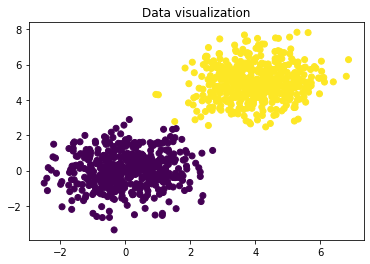

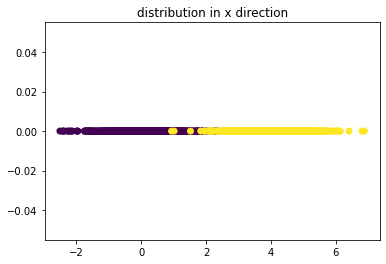

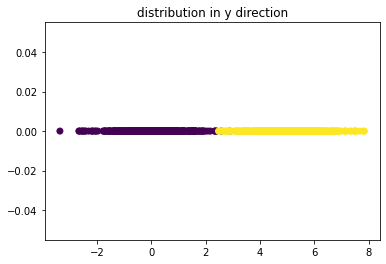

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')


Text(0.5, 1.0, 'Data visualization')

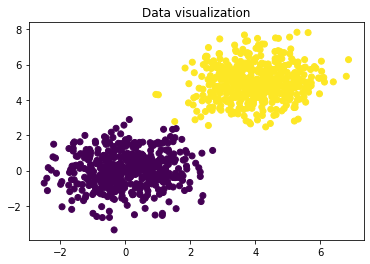

In [ ]:
#Data normalization

# perform data normalization here using mean substraction and std division
plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')

In [ ]:
data.shape

(1000, 2)

[[-0.62039911 -0.78428627]
 [-0.78428627  0.62039911]] 
 
 [11014.44630439   866.36686617] 
 
 [[-0.62039911 -0.78428627]
 [-0.78428627  0.62039911]] 
 
 (1000, 2)
variance along pca1 direction= 11.014446304387564
variance along pca2 direction= 0.8663668661679267


Text(0.5, 1.0, 'distribution in pca2 direction')

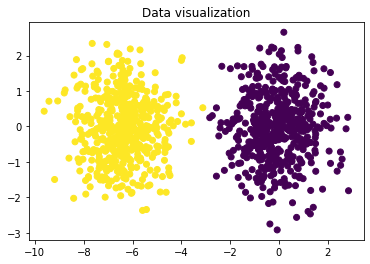

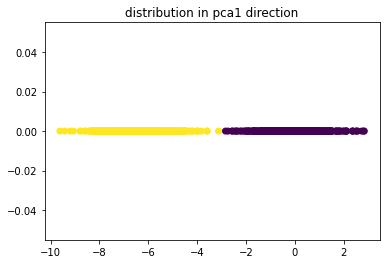

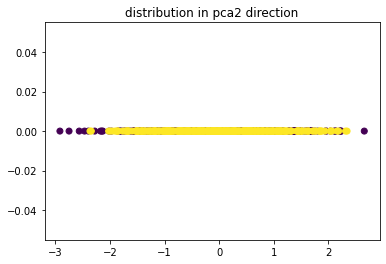

In [ ]:
###############
Data=data- np.mean(data, axis=0)
cov=Data.T @ Data

u,s,v=np.linalg.svd(cov)

trans_data=data @ u
print(u,"\n","\n",s,"\n","\n",v,"\n","\n",data.shape)

# # ######

var_pca1=np.var(trans_data[:,0])
var_pca2=np.var(trans_data[:,1])

print('variance along pca1 direction=',var_pca1)
print('variance along pca2 direction=',var_pca2)


plt.figure()
plt.scatter(trans_data[:,0],trans_data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(trans_data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca1 direction')
plt.figure()
plt.scatter(trans_data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca2 direction')


PCA 1 dimension is sufficient, we can droup PCA 2 dimension

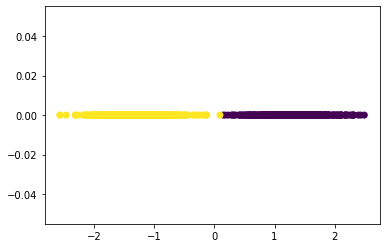

In [ ]:
##############


class pca:
  # Constructor
  def __init__(self, name='reg',data=None,retain_dim=None):
    self.name = name  # Create an instance variable
    self.data=data
    self.retain_dim=retain_dim if retain_dim is not None else self.ret_dim(self.data)
    # compute pca transform value
  def pca_comp(self,data):
    data=self.pre_process(data)
    cov= data.T @ data# insert your code here
    u,_,_=np.linalg.svd(cov) # singular value decomposition
    u_req=u[:,:self.ret_dim(data)] # insert your code here
    trans_data=data @ u_req# insert your code here
    return trans_data,u_req
    # compute the required retain dimension
  def ret_dim(self,data):
    data=self.pre_process(data)
    cov=data.T @ data
    _,s,_=np.linalg.svd(cov)
    j=np.sum(s**2)
    for i in range(1,len(s)+1):
      if (np.sum(s[:i]**2)/(j) >= 0.9):
        ind=i-1
        break
    else:
      ind=len(s)-1
    # ind=# insert your code here # can also take 90% 
    return ind+1
  def pre_process(self,data):
    data1=(data-np.mean(data,axis=0))
    
    data=data1/(np.std(data1,axis=0)+10**(-30)) # avoid divide by zero
    return data


PCA=pca(data=data)
trans_data,trans_mat=PCA.pca_comp(data)
plt.scatter(trans_data,np.zeros(trans_data.shape),c=label)

In [ ]:
trans_data.shape,trans_mat.shape

((1000, 1), (2, 1))

In [ ]:
#classification using pca
#use k-nearest neighbour classifier after dimensionality reduction

from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, label)

print('KNN Training accuracy =',knn.score(trans_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy =',knn.score(PCA.pre_process(data) @ trans_mat,tst_label)*100)





KNN Training accuracy = 99.9
KNN Testing accuracy = 100.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install idx2numpy

(100, 784)
(100,)


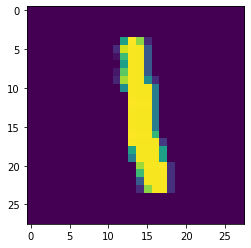

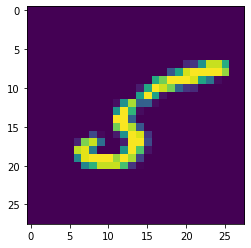

In [ ]:
# MNIST data

import numpy as np
import matplotlib.pyplot as plt 

file1='/content/drive/MyDrive/Copy of train-images.idx3-ubyte'
file2='/content/drive/MyDrive/Copy of train-labels.idx1-ubyte'

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[1,5]

# for class 1

id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[:50]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[:50]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

#print(Im_5.shape)

data=np.concatenate((Im_1,Im_5))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5))
print(G_lab.shape)

data = data.astype('float32')

data /= 255



Initial data dimension= 784
Retained dimesion after PCA= 10
KNN Training accuracy = 95.0
(50, 28, 28)
KNN Testing accuracy = 100.0


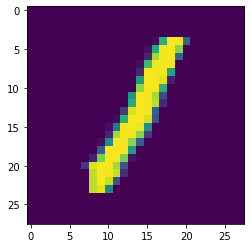

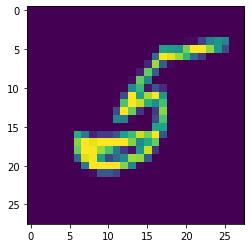

In [ ]:
print('Initial data dimension=',data.shape[1])
PCA=pca(data=data)

trans_data,trans_mat=PCA.pca_comp(data)
print('Retained dimesion after PCA=',trans_mat.shape[1])
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)


## testing
## data preparation
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

print(Im_5.shape)

data_tst=np.concatenate((Im_1,Im_5))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab=np.concatenate((lab_1,lab_5))


# final testing
print('KNN Testing accuracy =',knn.score(PCA.pre_process(data_tst) @ trans_mat,tst_lab)*100)


# Linear Discriminate Analysis (LDA)

Text(0.5, 1.0, 'distribution in y direction')

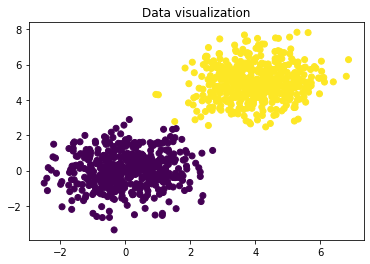

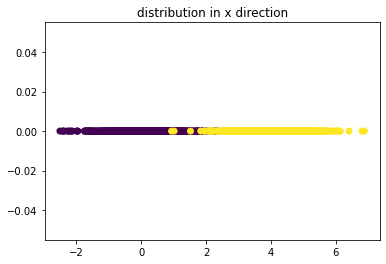

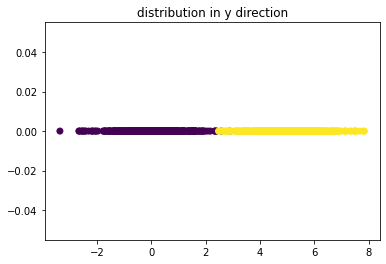

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
# data generation

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')

In [ ]:
# perform 2-class and m-class LDA
def LDA(data,label):  
  id={}
  data_l={}
  mean_l={}
  cov_l={}
  S_w=np.zeros((data.shape[1],data.shape[1]))


  cls=np.unique(label)
  for i in cls:
    id[i]=np.where(label==i)[0]
    data_l[i]=data[id[i],:]
    mean_l[i]=np.mean(data_l[i],axis=0)
    d=data_l[i]-mean_l[i]
    cov_l[i]=(d).T @ (d)# insert your code here
    S_w=S_w+cov_l[i]


  S_w=S_w/len(data_l)

  if len(data_l)==2:
    m=mean_l[0]-mean_l[1]
    S_b= ( m ).T @ ( m )# insert your code here
    w= np.linalg.inv(S_w) @ (m) # insert your code here

  else:
    S_t=np.cov(data,rowvar=False)
    S_b= np.zeros((data.shape[1],data.shape[1])) # insert your code here
    m=np.mean(data,axis=0)
    for i in cls:
      m_i=mean_l[i]-m
      S_b += ( m_i ).T @ ( m_i ) * len(data_l[i])
    
    u,_,_= svd( np.linalg.inv( S_w ) @ S_b ) # insert your code here
    w=u[:,:len(data_l)-1]

  return w




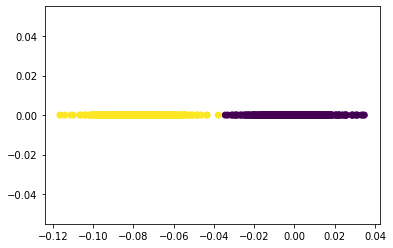

In [ ]:
# after LDA projection

w=LDA(data,label)
plt.figure()
plt.scatter(data @ w,np.zeros(data.shape[0]),c=label)


In [ ]:
#classification using pca
#use k-nearest neighbour classifier after dimensionality reduction


from sklearn.neighbors import KNeighborsClassifier

LDA_data= data @ w[:,np.newaxis]
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(LDA_data, label)

print('KNN Training accuracy =',knn.score(LDA_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data_tst=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy =',knn.score(data_tst@ w[:,np.newaxis],tst_label)*100)



KNN Training accuracy = 100.0
KNN Testing accuracy = 100.0


## LDA multiclass 
1. 3 class Sythetic data
2. Homework: Mnist 3 class and 10 class



Text(0.5, 1.0, 'distribution in y direction')

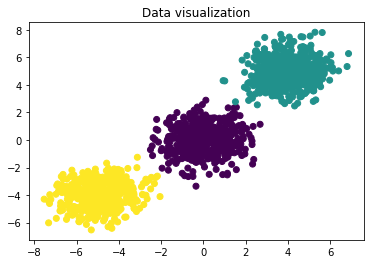

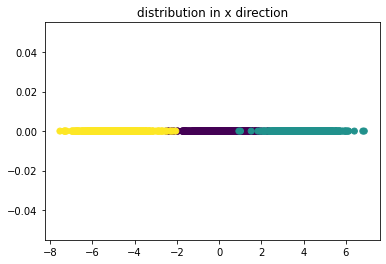

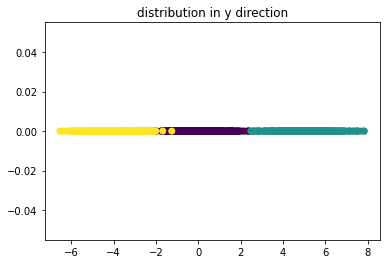

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([4,5])
mean3=np.array([-5,-4])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data3=np.random.multivariate_normal(mean3,var,500)
data=np.concatenate((data1,data2,data3))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data3.shape[0])+1))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')


(2, 2)


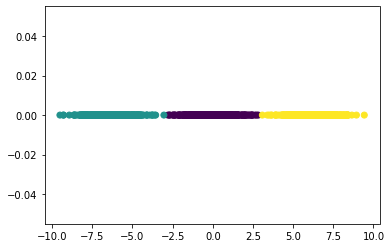

In [ ]:
# after projection
w=LDA(data,label)
print(w.shape)
plt.figure()
plt.scatter(data @ w[:,0],np.zeros(data.shape[0]),c=label) # by performing 1D projection

In [ ]:
# testing (using KNN)

from sklearn.neighbors import KNeighborsClassifier

LDA_data= data @ w
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(LDA_data, label)

print('KNN Training accuracy =',knn.score(LDA_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data3=np.random.multivariate_normal(mean3,var,50)
data_tst=np.concatenate((data1,data2,data3))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data2.shape[0])+1))

print('KNN Testing accuracy =',knn.score(data_tst@ w,tst_label)*100)


KNN Training accuracy = 99.93333333333332
KNN Testing accuracy = 100.0


In [ ]:
c="/content/drive/MyDrive/Colab Notebooks/Copy of Dimensionality reduction .ipynb"

In [ ]:
!cp drive/MyDrive/Colab Notebooks/CopyOfDimensionalityReduction.ipynb ./

cp: cannot stat 'drive/MyDrive/Colab': No such file or directory
cp: cannot stat 'Notebooks/CopyOfDimensionalityReduction.ipynb': No such file or directory


In [ ]:
!jupyter nbconvert --to PDF "drive/MyDrive/Colab Notebooks/CopyOfDimensionalityReduction.ipynb"

[NbConvertApp] WARNING | pattern u'drive/MyDrive/Colab Notebooks/CopyOfDimensionalityReduction.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with d